## Assignment 6
Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. 
Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("sales_data_sample.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df = df[['ORDERNUMBER','PRICEEACH']]
df.dropna(axis=0)

,ORDERNUMBER,PRICEEACH
0,10107,95.70
1,10121,81.35
2,10134,94.74
3,10145,83.26
4,10159,100.00
...,...,...
2818,10350,100.00
2819,10373,100.00
2820,10386,100.00
2821,10397,62.24


In [7]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1,11):
    clustering = KMeans(n_clusters = i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
print(wcss)
ks = np.arange(1,11)
print(ks)

[25078370.734453753, 6988709.05025336, 3985111.0206519878, 2683109.366446041, 2132806.260065433, 1837980.4666440699, 1635455.754362278, 1465061.0761872558, 1281798.1920554503, 1130001.3684900978]
[ 1  2  3  4  5  6  7  8  9 10]


<AxesSubplot:>

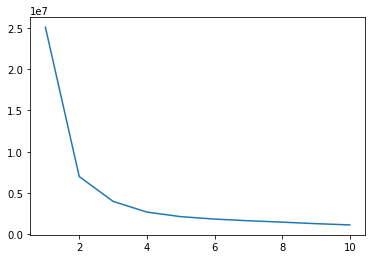

In [13]:
sns.lineplot(x=ks, y=wcss)

Text(0.5, 1.0, 'With clustering')

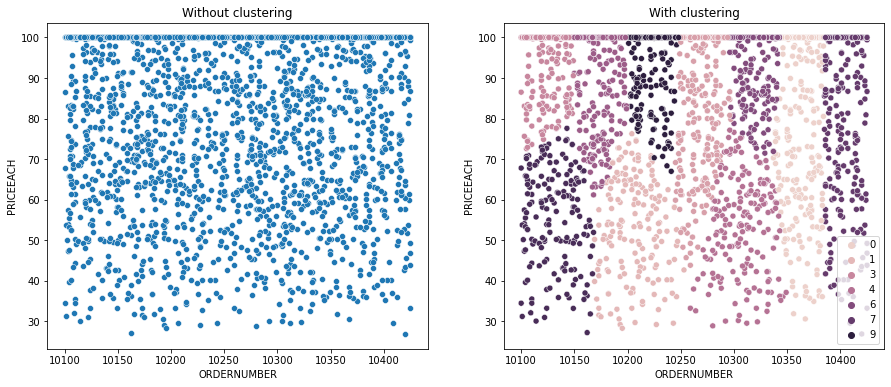

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.scatterplot(ax=axes[0], data=df,x='ORDERNUMBER', y='PRICEEACH' ).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df,x='ORDERNUMBER', y='PRICEEACH', hue=clustering.labels_).set_title('With clustering')


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
scaled = ss.fit_transform(df)

In [27]:
scaled

array([[-1.64794709,  0.5969775 ],
       [-1.4958875 , -0.11445035],
       [-1.35468931,  0.54938372],
       ...,
       [ 1.38238338,  0.81015797],
       [ 1.50185877, -1.06186404],
       [ 1.68650256, -0.89925195]])

In [29]:
wcss_sc= []
for i in range(1,11):
    clustering_sc  = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(df)
    wcss_sc.append(clustering_sc.inertia_)
print(wcss_sc)
ks_sc = np.arange(1,11)
print(ks_sc)

[25078370.734453753, 6988709.05025336, 3985111.0206519878, 2683109.366446041, 2132806.260065433, 1837980.4666440692, 1635455.754362278, 1465061.0761872558, 1281798.1920554505, 1130001.3684900976]
[ 1  2  3  4  5  6  7  8  9 10]


<AxesSubplot:>

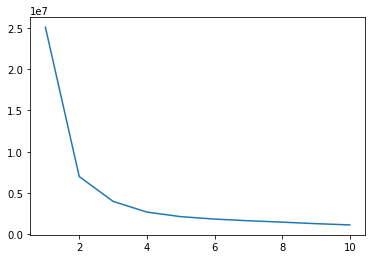

In [30]:
sns.lineplot(x=ks_sc, y=wcss_sc)